### **Cổ phiếu**
Cổ phiếu (stock) là một trong những loại chứng khoán phổ biến nhất trên thị trường tài chính. Nó thường được phát hành bởi các công ty cổ phần để huy động vốn từ các nhà đầu tư. Khi bạn mua cổ phiếu của một công ty, bạn sẽ trở thành một trong những cổ đông của công ty đó. Cổ đông sẽ có quyền tham gia vào quản trị công ty bằng cách bỏ phiếu tại các cuộc họp cổ đông.  
Trong kinh tế, cổ phiếu đóng vai trò quan trọng trong việc huy động vốn cho công ty, giúp các công ty tăng vốn để đầu tư và phát triển hoạt động kinh doanh. Cổ phiếu cũng là một công cụ giúp các nhà đầu tư có thể đầu tư vào các công ty và được chia sẻ lợi nhuận từ hoạt động kinh doanh của công ty đó.

### **Biến động giá cổ phiếu**
Biến động giá cổ phiếu là sự thay đổi về giá của một cổ phiếu theo thời gian. Điều này có thể xảy ra khi có những thay đổi trong tình hình kinh tế, tình hình chính trị, hoạt động kinh doanh của công ty, hoặc do yếu tố tâm lý của các nhà đầu tư. Các biến động giá cổ phiếu có thể là tăng giá hoặc giảm giá, tùy thuộc vào tình hình thị trường.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

import os
import pickle
import matplotlib.dates as mdates

import time

2024-05-27 08:03:27.503438: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 08:03:27.839857: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 08:03:27.842675: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 08:03:29.567332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
%cd "/content/drive/MyDrive/Finpros"

/content/drive/MyDrive/Finpros


In [2]:
vic_data = pd.read_csv('data/VIC.csv')
fpt_data = pd.read_csv('data/FPT.csv')
msn_data = pd.read_csv('data/MSN.csv')
pnj_data = pd.read_csv('data/PNJ.csv')
vic_data

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0
...,...,...,...,...,...,...,...,...
101261,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
101262,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
101263,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
101264,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0


In [3]:
print('VIC: ', vic_data.shape)
print('FPT: ', fpt_data.shape)
print('MSN: ', msn_data.shape)
print('PNJ: ', pnj_data.shape)


VIC:  (101266, 8)
FPT:  (97406, 8)
MSN:  (135354, 8)
PNJ:  (125309, 8)


In [4]:
vic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ MB


In [5]:
vic_data.describe()

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


In [6]:
def ChangeDate(data):
    data['Date/Time'] = pd.to_datetime(data['Date/Time'])
ChangeDate(vic_data)
ChangeDate(fpt_data)
ChangeDate(msn_data)
ChangeDate(pnj_data)
vic_data

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,2018-10-17 09:39:00,98.5,98.5,98.5,98.5,390,0
1,VIC,2018-10-17 09:40:00,98.5,98.5,98.5,98.5,760,0
2,VIC,2018-10-17 09:41:00,98.6,98.6,98.6,98.6,2060,0
3,VIC,2018-10-17 09:42:00,98.6,98.6,98.6,98.6,5540,0
4,VIC,2018-10-17 09:43:00,98.6,98.7,98.6,98.7,760,0
...,...,...,...,...,...,...,...,...
101261,VIC,2020-12-22 14:22:00,105.8,105.8,105.7,105.7,1870,0
101262,VIC,2020-12-22 14:23:00,105.7,105.7,105.7,105.7,2510,0
101263,VIC,2020-12-22 14:24:00,105.7,105.7,105.7,105.7,3620,0
101264,VIC,2020-12-22 14:25:00,105.7,105.7,105.7,105.7,100,0


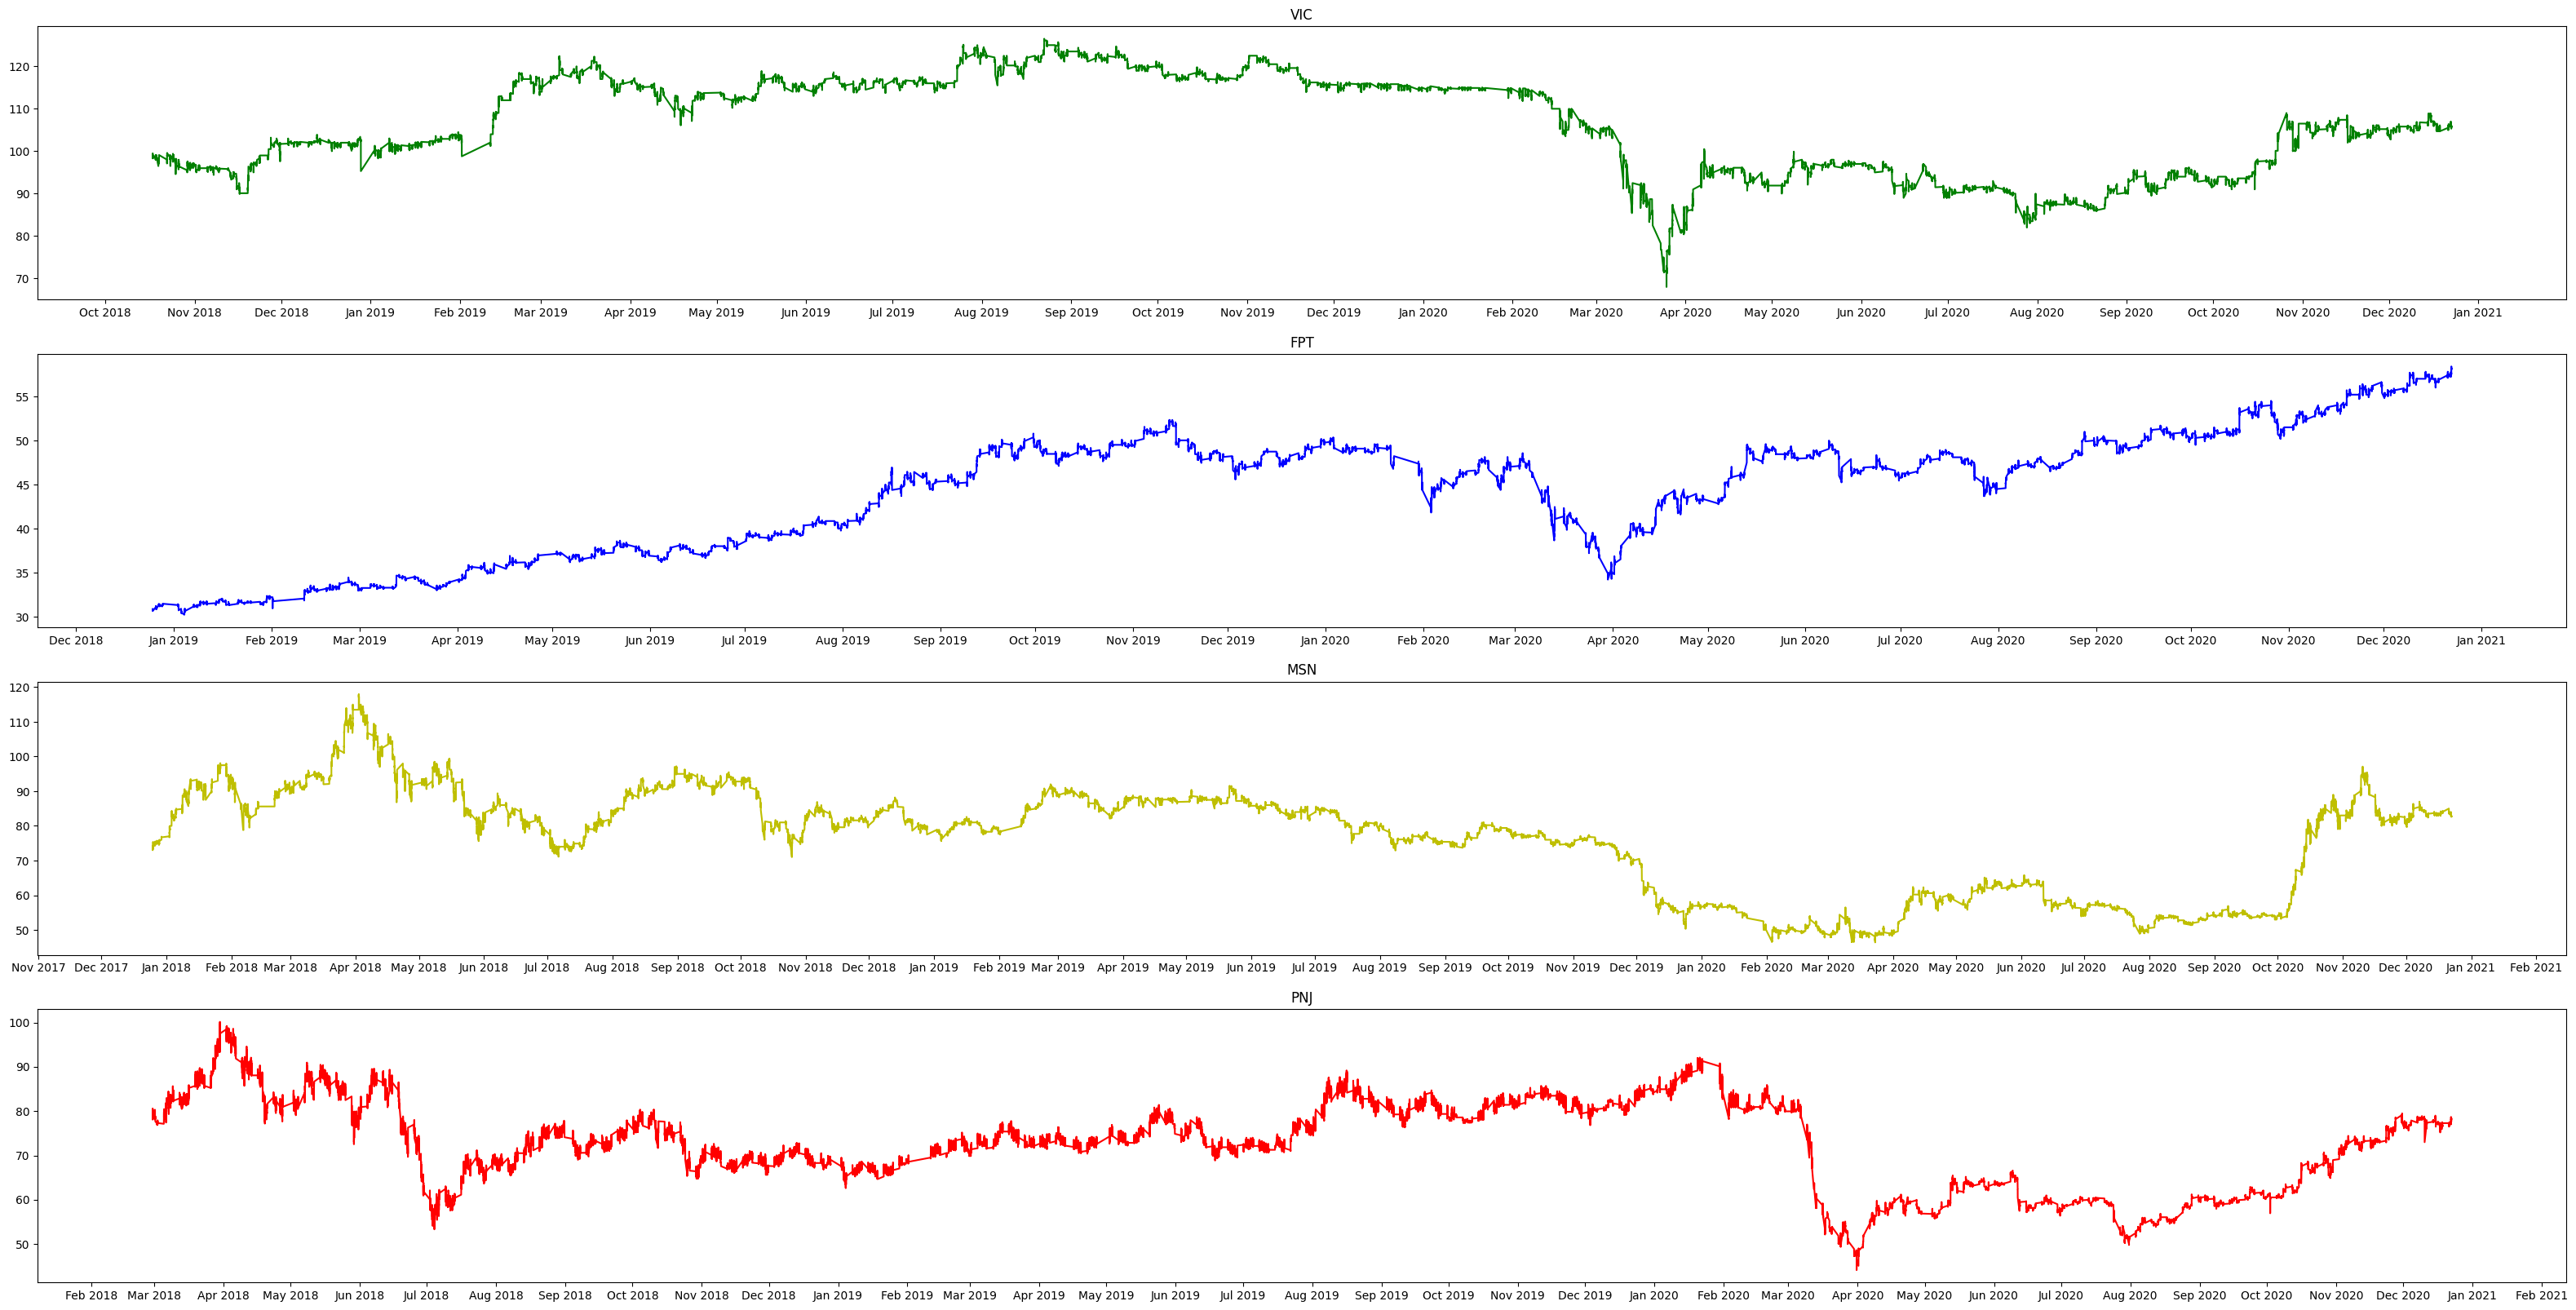

In [9]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(40,20))
ax1.plot(vic_data['Date/Time'],vic_data['Close'], label='VIC', color = 'g')
ax1.set_title('VIC')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax2.plot(fpt_data['Date/Time'],fpt_data['Close'], label='FPT', color = 'b')
ax2.set_title('FPT')
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax3.plot(msn_data['Date/Time'],msn_data['Close'], label='MSN', color = 'y')
ax3.set_title('MSN')
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax4.plot(pnj_data['Date/Time'],pnj_data['Close'], label='PNJ', color = 'r')
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax4.set_title('PNJ')
plt.savefig('image/visualize_stock.png')
plt.show()

In [12]:
def GetClose(company_data):
  df = pd.DataFrame(company_data, columns = ['Date/Time', 'Close'])
  df.set_index("Date/Time", inplace=True)
  return df

In [13]:
df_vic = GetClose(vic_data)
df_fpt = GetClose(fpt_data)
df_msn = GetClose(msn_data)
df_pnj = GetClose(pnj_data)
df_vic

,Close
Date/Time,
2018-10-17 09:39:00,98.5
2018-10-17 09:40:00,98.5
2018-10-17 09:41:00,98.6
2018-10-17 09:42:00,98.6
2018-10-17 09:43:00,98.7
...,...
2020-12-22 14:22:00,105.7
2020-12-22 14:23:00,105.7
2020-12-22 14:24:00,105.7


In [14]:
def train_test_split(company_data):
  train_data = company_data[:int(company_data.shape[0] * 0.8)]
  test_data = company_data[int(company_data.shape[0] * 0.8):]
  return train_data,test_data,int(company_data.shape[0] * 0.8)


In [15]:
train_data_vic,test_data_vic,len_vic = train_test_split(df_vic)
train_data_fpt,test_data_fpt,len_fpt = train_test_split(df_fpt)
train_data_pnj,test_data_pnj,len_pnj = train_test_split(df_pnj)
train_data_msn,test_data_msn,len_msn = train_test_split(df_msn)
train_data_vic

,Close
Date/Time,
2018-10-17 09:39:00,98.5
2018-10-17 09:40:00,98.5
2018-10-17 09:41:00,98.6
2018-10-17 09:42:00,98.6
2018-10-17 09:43:00,98.7
...,...
2020-07-31 10:02:00,86.7
2020-07-31 10:03:00,86.7
2020-07-31 10:04:00,87.0


In [16]:
sc = MinMaxScaler(feature_range = (0,1))
sc_train = sc.fit_transform(train_data_vic)

In [17]:
sc_train[0]

array([0.52136752])

In [18]:
x_train, y_train = [],[]
for i in range(180,len(train_data_vic)):
  x_train.append(sc_train[i-180:i,0])
  y_train.append(sc_train[i,0])

### **Xây dựng mô hình**

Trong các bài toán thời gian thực, chúng ta nghĩ ngay đến RNN và LSTM. Trong bài toán dự đoán giá cổ phiếu lần này có rất nhiều dữ liệu(chia theo từng phút) vì vậy LSTM hiệu quả hơn RNN

### Định dạng dữ liệu cho mô hình LSTM:
STM yêu cầu đầu vào có định dạng là một tensor 3 chiều với kích thước [samples,timesteps, features].  
    samples: Số lượng mẫu trong tập dữ liệu.  
    timesteps: Số bước thời gian trong mỗi mẫu (ví dụ, số ngày hoặc số phiên giao dịch).  
    features: Số lượng đặc trưng tại mỗi bước thời gian (ví dụ, giá mở, giá đóng, khối lượng giao dịch, v.v.).

In [19]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))
x_train.shape

(80832, 180, 1)

In [20]:
#xây dựng mô hình
model = Sequential()

model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

In [23]:
save_path = "data/saved/best_vic_model.h5"

In [56]:
best_model = ModelCheckpoint(save_path,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=180,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.04064, saving model to data/best_vic_model.h5
450/450 - 12s - loss: 0.0406 - 12s/epoch - 28ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.04064 to 0.02913, saving model to data/best_vic_model.h5
450/450 - 9s - loss: 0.0291 - 9s/epoch - 20ms/step
Epoch 3/100

Epoch 3: loss improved from 0.02913 to 0.02475, saving model to data/best_vic_model.h5
450/450 - 10s - loss: 0.0247 - 10s/epoch - 22ms/step
Epoch 4/100

Epoch 4: loss improved from 0.02475 to 0.02054, saving model to data/best_vic_model.h5
450/450 - 10s - loss: 0.0205 - 10s/epoch - 22ms/step
Epoch 5/100

Epoch 5: loss improved from 0.02054 to 0.01720, saving model to data/best_vic_model.h5
450/450 - 10s - loss: 0.0172 - 10s/epoch - 22ms/step
Epoch 6/100

Epoch 6: loss improved from 0.01720 to 0.01451, saving model to data/best_vic_model.h5
450/450 - 10s - loss: 0.0145 - 10s/epoch - 22ms/step
Epoch 7/100

Epoch 7: loss improved from 0.01451 to 0.01280, saving model to data/best_vic_model.h5
450/450 - 10s - loss: 0.0128 - 10s/epoch - 21ms/step
Epoch 8/100

Epoch 8: loss improved from 0.01280 to 0.01173, saving model to data/best_vic_model

In [24]:
y_train = sc.inverse_transform(y_train)
best_model = load_model(save_path)
y_train_pred = best_model.predict(x_train)
y_train_pred = sc.inverse_transform(y_train_pred)

2526/2526 [==============================] - 270s 107ms/step


### Test với các giá trị còn lại trong vic_data

In [25]:
test = df_vic[len(train_data_vic)-180:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(180,test.shape[0]):
  x_test.append(sc_test[i-180:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

y_test = df_vic[len_vic:]
y_test_predict = best_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


633/633 [==============================] - 69s 107ms/step


<ipython-input-31-32e3a3011c3b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Predict'] = y_train_pred
<ipython-input-31-32e3a3011c3b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Predict'] = y_test_predict


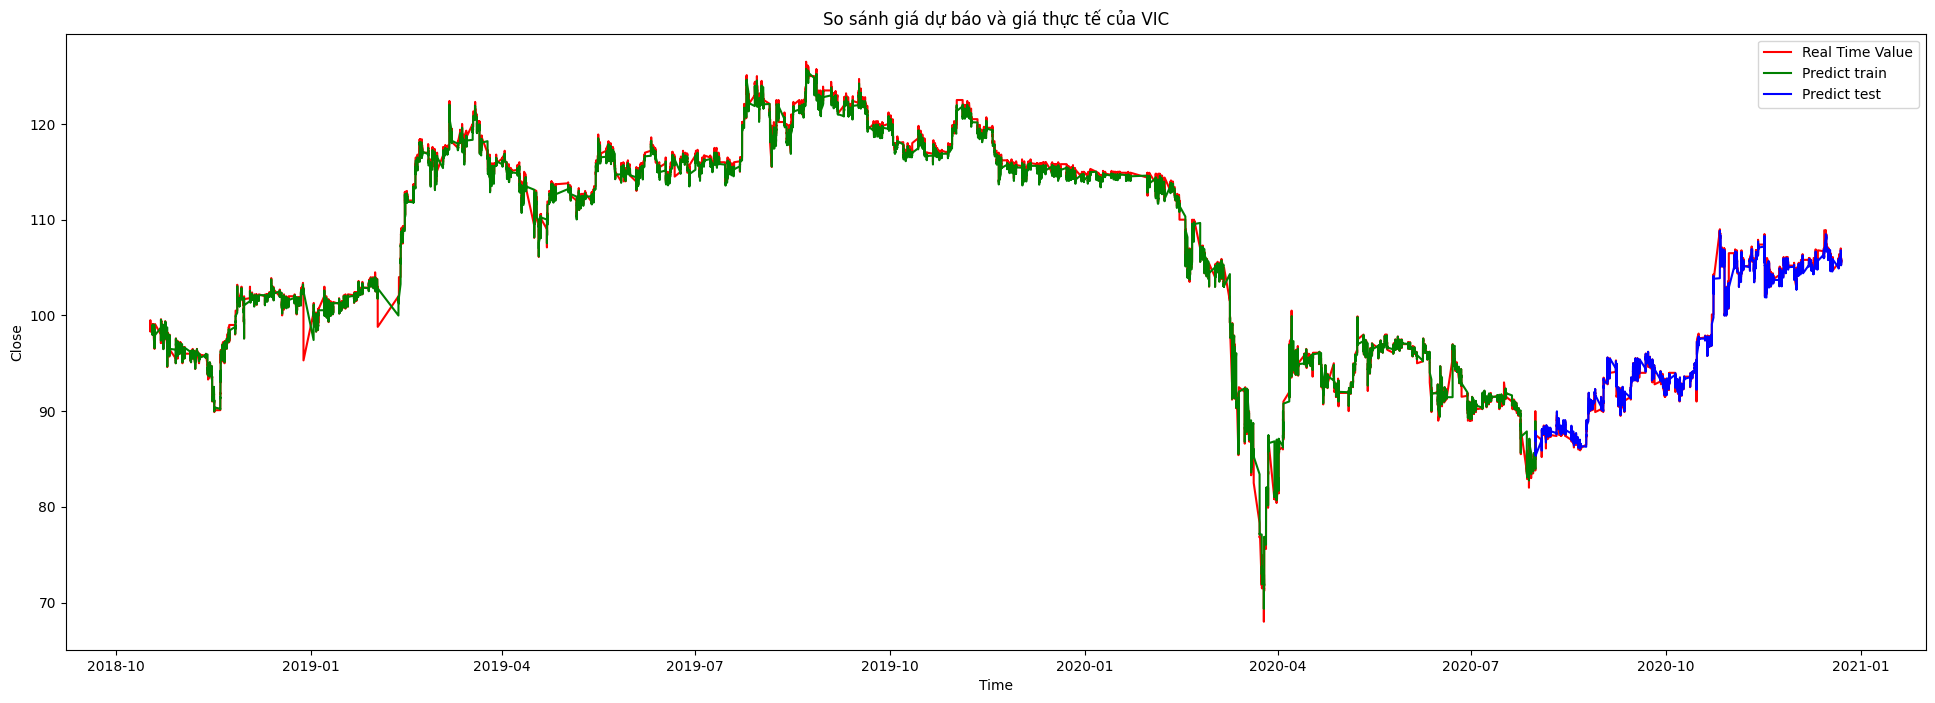

In [31]:
train_data1 = df_vic[180:len_vic]
test_data1 = df_vic[len_vic:]

plt.figure(figsize=(24,8))
plt.plot(df_vic,label='Real Time Value',color='red')
train_data1['Predict'] = y_train_pred
plt.plot(train_data1['Predict'],label='Predict train',color='green')
test_data1['Predict'] = y_test_predict
plt.plot(test_data1['Predict'],label='Predict test',color='blue')
plt.title('So sánh giá dự báo và giá thực tế của VIC')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.savefig("image/VIC_test.png")
plt.show()

In [63]:
print('Độ phù hợp tập train:',r2_score(y_train,y_train_pred) * 100,'%')
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_pred))
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_pred))

Độ phù hợp tập train: 99.93389551826482 %
Sai số tuyệt đối trung bình trên tập train (VNĐ): 0.23174262214820734
Phần trăm sai số tuyệt đối trung bình tập train: 0.002107290199230451


In [64]:
train_data1

,Close,Predict
Date/Time,,
2018-10-18 09:28:00,98.2,98.139397
2018-10-18 09:31:00,98.1,98.154869
2018-10-18 09:32:00,98.1,98.090767
2018-10-18 09:33:00,98.0,98.070236
2018-10-18 09:34:00,98.0,97.995644
...,...,...
2020-07-31 10:02:00,86.7,86.965668
2020-07-31 10:03:00,86.7,86.866348
2020-07-31 10:04:00,87.0,86.836113


In [65]:
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.999095410142939
Sai số tuyệt đối trung bình trên tập test (VNĐ): 0.14148039841823792
Phần trăm sai số tuyệt đối trung bình tập test: 0.001445056955530423


In [66]:
test_data1

,Close,Predict
Date/Time,,
2020-07-31 10:08:00,86.8,87.121201
2020-07-31 10:09:00,86.8,86.983994
2020-07-31 10:10:00,86.8,86.939629
2020-07-31 10:11:00,86.8,86.928429
2020-07-31 10:12:00,86.7,86.925827
...,...,...
2020-12-22 14:22:00,105.7,105.665428
2020-12-22 14:23:00,105.7,105.597763
2020-12-22 14:24:00,105.7,105.575676


In [29]:
print(df_vic.columns)

Index(['Close'], dtype='object')


1/1 [==============================] - 0s 67ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


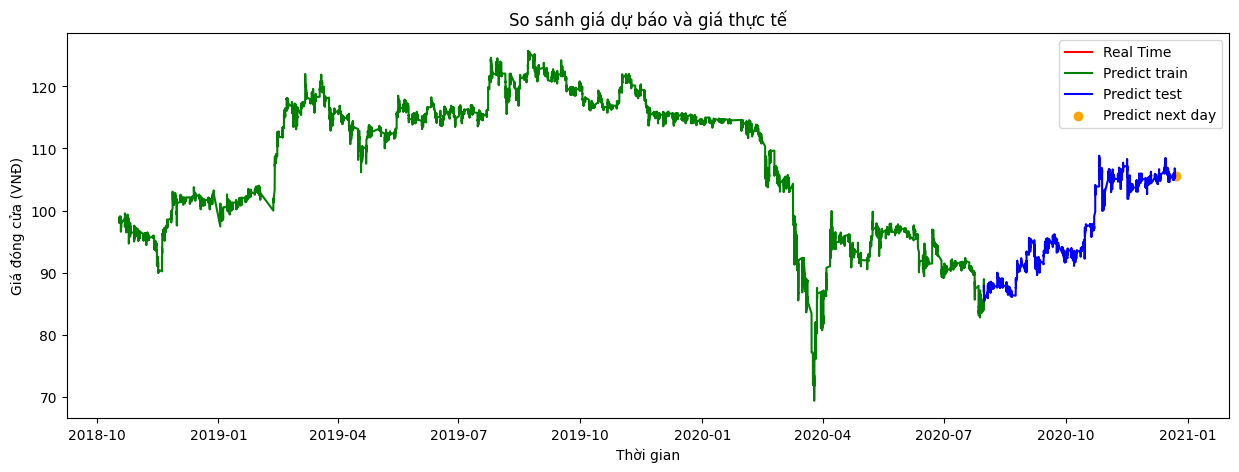

In [40]:
next_date = df_vic.index[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df_vic['Close'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

x_next = np.array([sc_test[-180:, 0]])
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = best_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

df_next = pd.DataFrame({'Date/Time': [next_date], 'Close': [y_next_predict[0][0]]})
df1 = pd.concat([df_vic, df_next])

plt.figure(figsize=(15, 5))
plt.plot(df1['Date/Time'], df1['Close'], label='Real Time', color='red')
plt.plot(train_data1.index, train_data1['Predict'], label='Predict train', color='green')
plt.plot(test_data1.index, test_data1['Predict'], label='Predict test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Predict next day')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.savefig('image/predict_VIC')
plt.show()

In [39]:
actual_closing_price = df_vic['Close'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

                 Ngày  Giá dự đoán  Giá ngày trước
0 2020-12-23 14:46:00   105.566391           105.7
